# Layered Network

##### Imports

In [1]:
# Custom Modules
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
from modules.hh_model import HodgkinHuxleyNeuron
from modules.layered_network import LayeredNetworkGraph

# Standard Modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Poly3DCollection

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

### Directed Erdos-Renyi Graph

In [2]:
def generate_erdos_renyi_digraph(n, p, s=''):
    # Create an empty directed graph
    G = nx.DiGraph()
    
    # Add nodes with custom names
    names = [s + str(i) for i in range(n)]
    for name in names:
        G.add_node(name)  # Assuming HodgkinHuxleyNeuron() is defined elsewhere
    
    # Add edges based on Erdos-Renyi probability
    for i, u in enumerate(names):
        for j, v in enumerate(names):
            if i != j and random.random() < p:
                G.add_edge(u, v)
    
    # Create neuron objects
    for node in G.nodes():
        G.nodes[node]['neuron'] = HodgkinHuxleyNeuron(0.01)
    
    return G

##### Sanity Check

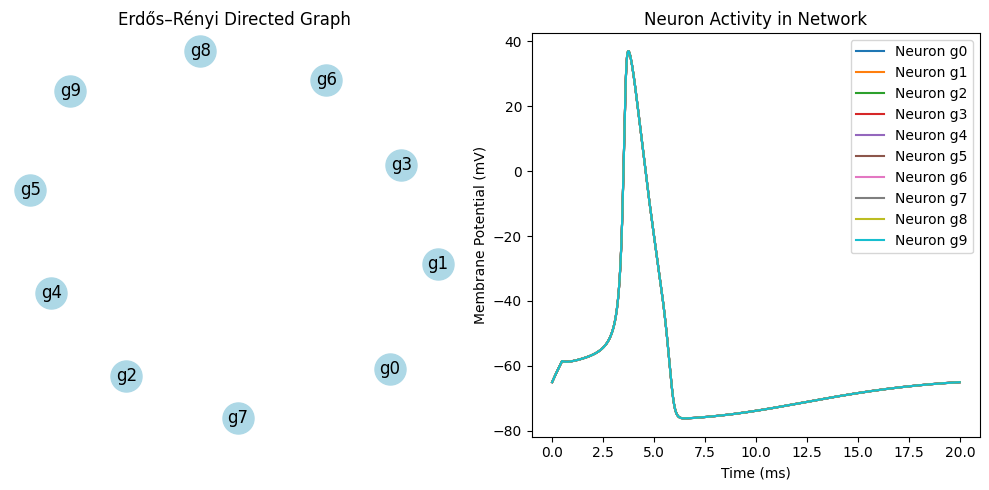

In [16]:
g = generate_erdos_renyi_digraph(10, 0, s='g')

# Parameters
T = 20.0
dt = 0.005
time = np.arange(0, T, dt)

I_inp = np.zeros(len(time))
I_inp[int(0/dt):int(0.5/dt)] = 15.0
I_inp[0] = 0

# Record data
V = {}
nodes = g.nodes()
for node in nodes:
        V[node] = []

Network = g.nodes()
for i in range(len(time)):
    for node in Network:
        neuron = Network[node]['neuron']
        neuron.step(I_inp[i])
        V[node].append(neuron.V)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20, ax=axes[0])
axes[0].set_title("Erdős–Rényi Directed Graph")
for node, voltages in V.items():
    axes[1].plot(time, voltages, label=f'Neuron {node}')
axes[1].legend()
axes[1].set_xlabel("Time (ms)")
axes[1].set_ylabel("Membrane Potential (mV)")
axes[1].set_title("Neuron Activity in Network")
plt.tight_layout()
plt.show()


### Single Layer

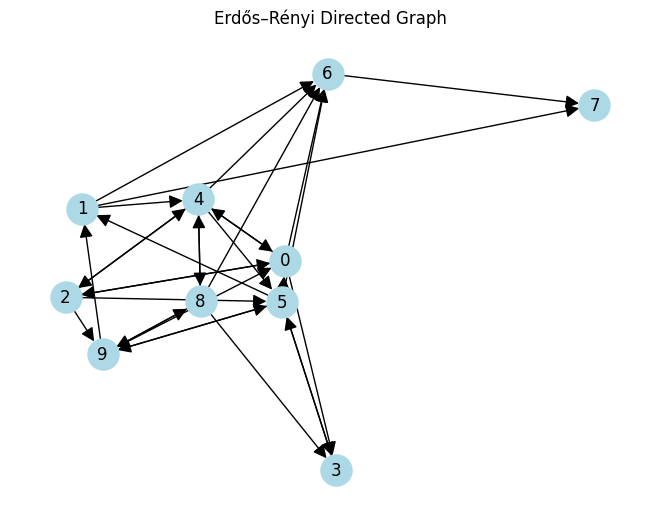

In [4]:
# Parameters
n = 10
p = 0.3

# Generate the graph
digraph = generate_erdos_renyi_digraph(n, p)

# Draw the graph
pos = nx.spring_layout(digraph)
nx.draw(digraph, pos, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
plt.title("Erdős–Rényi Directed Graph")
plt.show()

## Layered Network

### Two layers

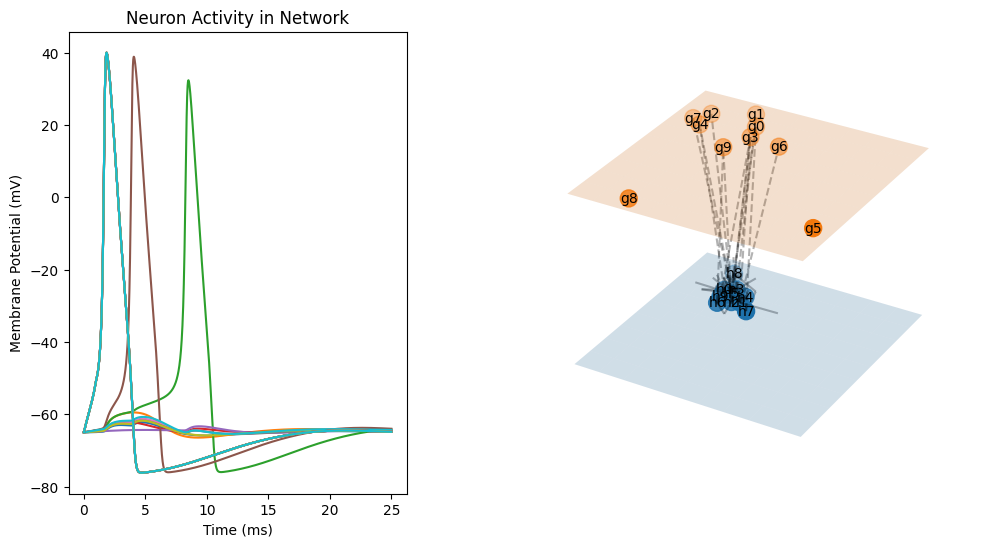

6.28


In [5]:
n = 10
p = 0.5
prob_inter = 0.2
time = 25
step = 0.01

Network = LayeredNetworkGraph([(n, 0, 'g'), (n, p, 'h')], time, step, inter_prob=prob_inter, verbose=True)
t = Network.run()

print(t)

##### Analysis

In [6]:
# Parameters
n = 10
p = 0.5
dt = 0.01
ps = np.arange(0, 1 + dt, dt)
time = 25
step = 0.01


# Simulation
N_sim = 20
peak_times = []
for pr in ps:
    Network = LayeredNetworkGraph([(n, 0, 'g'), (n, p, 'h')], time, step, inter_prob=pr, verbose=False)
    t = Network.run()

    peak_times.append(t)

In [7]:
import numpy as np
from multiprocessing import Pool

# Assuming LayeredNetworkGraph is defined elsewhere
# Define your parameters
n = 10
p = 0.5
dt = 0.01
ps = np.arange(0, 1 + dt, dt)
time = 25
step = 0.01
N_sim = 20

# Function to run a single simulation
def run_simulation(pr):
    # Initialize the network
    Network = LayeredNetworkGraph([(n, 0, 'g'), (n, p, 'h')], time, step, inter_prob=pr, verbose=False)
    # Run the simulation and return the result
    return Network.run()

# Parallel execution
if __name__ == "__main__":
    # Create a pool of worker processes
    with Pool(processes=4) as pool:
        # Run the simulations in parallel for each probability in ps
        peak_times = pool.map(run_simulation, ps)

    # print("Peak times:", peak_times)


In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# # Example: A function to fit (e.g., exponential decay)
# def fit_function(x, a, b, c):
#     return a * np.exp(-b * x) + c

# # Filter out peak_times == 0
# valid_indices = np.array(peak_times) != 0  # Create a mask for non-zero values
# filtered_ps = ps[valid_indices]
# filtered_peak_times = np.array(peak_times)[valid_indices]

# # Perform curve fitting
# popt, pcov = curve_fit(fit_function, filtered_ps, filtered_peak_times)

# # Generate data for plotting the fit
# fit_x = np.linspace(min(filtered_ps), max(filtered_ps), 500)
# fit_y = fit_function(fit_x, *popt)

# # Plot the results
# plt.figure(figsize=(8, 5))
# plt.scatter(filtered_ps, filtered_peak_times, label="Filtered Data", color="blue")
# plt.plot(fit_x, fit_y, label="Curve Fit", color="red", linestyle="--")
# plt.xlabel("ps")
# plt.ylabel("Peak Times")
# plt.legend()
# plt.title("Curve Fit Ignoring Zero Peak Times")
# plt.grid()
# plt.show()


In [9]:
# Define a structured dtype
n_ty = np.dtype([('name', 'U10'), ('node', 'O')])

# Create a record array
record = np.zeros(1, dtype=n_ty)

# Initialize the first record
record['name'][0] = 'g0'
record['node'][0] = HodgkinHuxleyNeuron(0.01)

record = np.append(record, np.array([('g1', HodgkinHuxleyNeuron(0.01))], dtype=n_ty))

# Print the final array
print(record['node'])